# Importation des bibliothèques

In [49]:
import sys
sys.path.insert(0, '..')

In [50]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from loss  import MSELoss
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Génération de données aléatoires

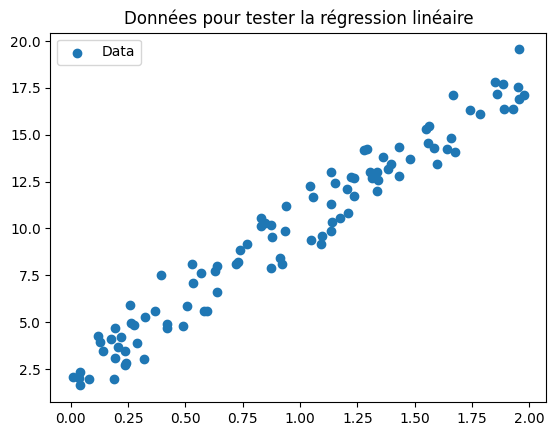

In [51]:

np.random.seed(0)
X = 2 * np.random.rand(100, 1)

a = 8
b = 2

noise = np.random.randn(100, 1)
y = a * X + b + noise

plt.scatter(X, y , label='Data')
plt.title('Données pour tester la régression linéaire')
plt.legend()
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('Train :', X_train.shape)
print('Test :', X_test.shape)

Train : (80, 1)
Test : (20, 1)


In [53]:
linear_module = Module_lineare(1, 1)
loss = MSELoss()
learning_rate = 0.001

train_losses = []
test_losses = []
test_accuracies = []
best_params = None
loss_min = math.inf

nb_epochs = 2000

for epoch in range(nb_epochs):
    linear_module.zero_grad()

    # Forward pass
    y_train_pred = linear_module.forward(X_train)
    loss_train = loss.forward(y_train, y_train_pred)
    train_losses.append(np.mean(loss_train))

    # Backward pass
    gradient_loss = loss.backward(y_train, y_train_pred)
    linear_module.backward_update_gradient(X_train, gradient_loss)
    delta_linear = linear_module.backward_delta(X_train, gradient_loss)

    # Mise à jour des paramètres
    linear_module.update_parameters(learning_rate)
    if np.mean(loss_train) < np.mean(loss_min) :
        best_params = linear_module.get_parameters()
        loss_min = loss_train
    else :
        linear_module.set_parameters(best_params)

    # Test accuracy
    y_test_pred = linear_module.forward(X_test)
    loss_test = loss.forward(y_test, y_test_pred)
    test_losses.append(np.mean(loss_test))
    # accuracy = np.sum(np.where(y_test == y_test_pred , 1, 0)[0])/len(X_test)
    # print(y_test , y_test_pred)
    # test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {np.mean(loss_train)}")

Epoch 1, Loss: 123.03785296069779
Epoch 2, Loss: 122.46079586610651
Epoch 3, Loss: 121.886500541798
Epoch 4, Loss: 121.31495377005919
Epoch 5, Loss: 120.74614239643647
Epoch 6, Loss: 120.18005332943278
Epoch 7, Loss: 119.61667354020646
Epoch 8, Loss: 119.05599006227132
Epoch 9, Loss: 118.49798999119821
Epoch 10, Loss: 117.942660484318
Epoch 11, Loss: 117.38998876042601
Epoch 12, Loss: 116.83996209948789
Epoch 13, Loss: 116.29256784234681
Epoch 14, Loss: 115.74779339043214
Epoch 15, Loss: 115.20562620546939
Epoch 16, Loss: 114.6660538091918
Epoch 17, Loss: 114.12906378305297
Epoch 18, Loss: 113.59464376794119
Epoch 19, Loss: 113.06278146389491
Epoch 20, Loss: 112.53346462981963
Epoch 21, Loss: 112.00668108320626
Epoch 22, Loss: 111.48241869985058
Epoch 23, Loss: 110.96066541357436
Epoch 24, Loss: 110.44140921594763
Epoch 25, Loss: 109.92463815601204
Epoch 26, Loss: 109.41034034000627
Epoch 27, Loss: 108.89850393109182
Epoch 28, Loss: 108.3891171490809
Epoch 29, Loss: 107.88216827016518


Epoch 309, Loss: 29.977405815447884
Epoch 310, Loss: 29.845731993735814
Epoch 311, Loss: 29.714688357236334
Epoch 312, Loss: 29.58427188991026
Epoch 313, Loss: 29.454479590153085
Epoch 314, Loss: 29.325308470725833
Epoch 315, Loss: 29.196755558686323
Epoch 316, Loss: 29.068817895320755
Epoch 317, Loss: 28.941492536075593
Epoch 318, Loss: 28.81477655048983
Epoch 319, Loss: 28.688667022127476
Epoch 320, Loss: 28.56316104851053
Epoch 321, Loss: 28.438255741052075
Epoch 322, Loss: 28.313948224989893
Epoch 323, Loss: 28.190235639320225
Epoch 324, Loss: 28.067115136731946
Epoch 325, Loss: 27.944583883541064
Epoch 326, Loss: 27.822639059625452
Epoch 327, Loss: 27.70127785835998
Epoch 328, Loss: 27.580497486551895
Epoch 329, Loss: 27.460295164376568
Epoch 330, Loss: 27.34066812531346
Epoch 331, Loss: 27.221613616082482
Epoch 332, Loss: 27.103128896580643
Epoch 333, Loss: 26.985211239818966
Epoch 334, Loss: 26.867857931859692
Epoch 335, Loss: 26.751066271753892
Epoch 336, Loss: 26.6348335714792

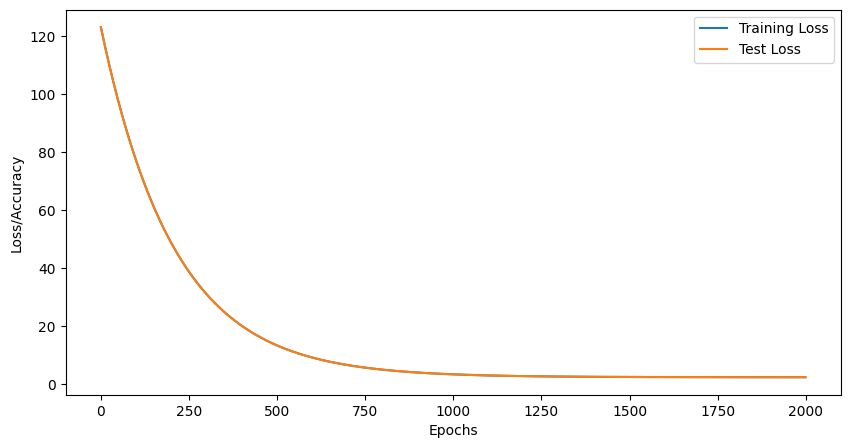

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(train_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

(100, 1)
(100,)


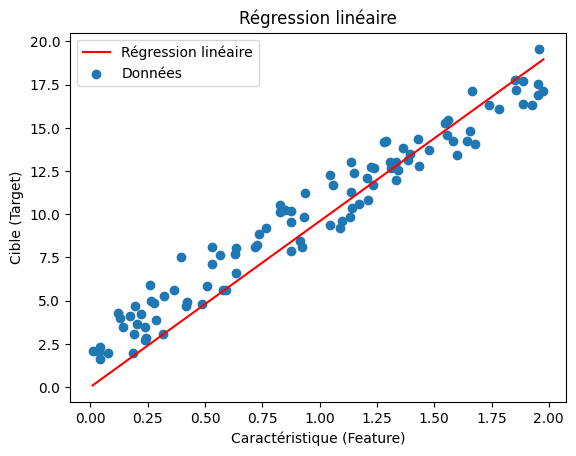

In [55]:
print(X.shape)
X = X.reshape(-1)
print(X.shape)

x_min, x_max = X.min(), X.max()
xs = np.linspace(x_min, x_max, 2)
weights = linear_module._parameters['weights'].reshape(-1)[0]
bias = linear_module._parameters['biais'].reshape(-1)[0]
ys = xs * weights + bias

plt.plot(xs, ys, 'r-', label='Régression linéaire')
plt.scatter(X, y, label='Données')
plt.xlabel('Caractéristique (Feature)')
plt.ylabel('Cible (Target)')
plt.title('Régression linéaire')
plt.legend()
plt.show()